In [1]:
import numpy as np
from keras.datasets import imdb
from keras import layers, models, optimizers

Se num_words =  10000 se para definir la cantidad de palabras que va a tener el dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
train_data.shape
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [6]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

Cambiando las llaves por los valores para consultarlo mas rápido en el diccionario

In [7]:
word_index = dict([(value,key) for (key, value) in word_index.items()])

Se resta menos 3 índices porque el dataset tiene 3 palabras reservadas al principio

In [8]:
for _ in train_data[0]:
    print(word_index.get(_ - 3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

Cuando se vectoriza un conjunto de palabras se pone 1 cuando la palabra está y 0 cuando no, en una oración por ejemplo

In [9]:
def vectorizer(sequences, dim = 10000):
    results = np.zeros((len(sequences), dim))

    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [10]:
x_train = vectorizer(train_data)
x_test = vectorizer(test_data)

Como el dataset es una lista, se convierte a tensores para usarlo en la red neuronal

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Se utiliza como input_shape (10 000,) porque es la cantidad de palabras que tiene el dataset por filas

In [12]:
model  = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


binary_crossentropy como función de pérdida se utiliza para clasificación binaria

In [13]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy'
)

Divido el dataset en un conjunto para entrenamiento y otro de validación

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [15]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Al entrenar el modelo, me devuelve un historial del comportamiento de la red neuronal, respecto a la pérdida y precisión, y también de validación si se lo paso como parámetro

In [16]:
history = model.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 512,
          validation_data = (x_val, y_val)
          )

Epoch 1/20
30/30 [==============================] - 4s 71ms/step - loss: 0.6047 - accuracy: 0.6186 - val_loss: 0.4857 - val_accuracy: 0.8583
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3796 - accuracy: 0.8849 - val_loss: 0.3466 - val_accuracy: 0.8788
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2633 - accuracy: 0.9162 - val_loss: 0.3040 - val_accuracy: 0.8824
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2046 - accuracy: 0.9349 - val_loss: 0.2851 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1683 - accuracy: 0.9461 - val_loss: 0.3011 - val_accuracy: 0.8761
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1436 - accuracy: 0.9555 - val_loss: 0.2890 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1211 - accuracy: 0.9650 - val_loss: 0.2990 - val_accuracy: 0.8826
Epoch 8/20
30

In [17]:
import matplotlib.pyplot as plt

In [18]:
history_dict = history.history

In [19]:
history_dict

{'loss': [0.6046891212463379,
  0.3795574903488159,
  0.26326483488082886,
  0.20455335080623627,
  0.16827639937400818,
  0.14363206923007965,
  0.12108680605888367,
  0.09868519008159637,
  0.08866527676582336,
  0.07483993470668793,
  0.06357870250940323,
  0.05160106346011162,
  0.043439991772174835,
  0.035367995500564575,
  0.029038630425930023,
  0.02729669213294983,
  0.024987628683447838,
  0.015439670532941818,
  0.012496416456997395,
  0.014342578127980232],
 'accuracy': [0.6186000108718872,
  0.8848666548728943,
  0.9161999821662903,
  0.9349333047866821,
  0.9461333155632019,
  0.9555333256721497,
  0.9649999737739563,
  0.9721333384513855,
  0.9754666686058044,
  0.9797333478927612,
  0.9845333099365234,
  0.98826664686203,
  0.9906666874885559,
  0.9941333532333374,
  0.9953333139419556,
  0.9949333071708679,
  0.994533360004425,
  0.9984666705131531,
  0.9991333484649658,
  0.9980000257492065],
 'val_loss': [0.4857242703437805,
  0.3466273546218872,
  0.3040289580821991

Obteniendo la pérdida de validación y de la red neuronal para graficarlo y comparar el comportamiento

In [20]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1,len(loss_values) + 1)

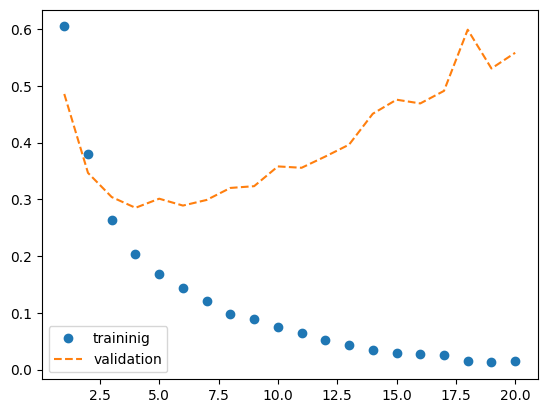

In [21]:
plt.plot(epoch, loss_values, 'o', label = 'traininig')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

Se evalúa el modelo con el dataset de prueba, pero como se vió en la gráfica, el modelo hizo overfitting o sobreajustes, por tanto hay que optimizarlo

In [22]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5969 - accuracy: 0.8608


[0.5969148278236389, 0.8608400225639343]

Una manera de optimizar un modelo es reduciendo su tamaño, por ejemplo, disminuyendo la cantidad de redes neuronales en cada capa

In [23]:
model2  = models.Sequential()
model2.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model2.add(layers.Dense(4, activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))

In [24]:
model2.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy'
)

In [25]:
history2 = model2.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 512,
          validation_data = (x_val, y_val)
          )

Epoch 1/20
30/30 [==============================] - 3s 87ms/step - loss: 0.5578 - accuracy: 0.7657 - val_loss: 0.4521 - val_accuracy: 0.8478
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3752 - accuracy: 0.8923 - val_loss: 0.3608 - val_accuracy: 0.8796
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2904 - accuracy: 0.9160 - val_loss: 0.3246 - val_accuracy: 0.8798
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2364 - accuracy: 0.9299 - val_loss: 0.2909 - val_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2013 - accuracy: 0.9408 - val_loss: 0.2802 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1726 - accuracy: 0.9500 - val_loss: 0.2771 - val_accuracy: 0.8888
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1524 - accuracy: 0.9548 - val_loss: 0.2773 - val_accuracy: 0.8871
Epoch 8/20
30

In [26]:
history_dict = history2.history

In [27]:
loss_values = history_dict['loss']
val_loss_values2 = history_dict['val_loss']

epoch = range(1,len(loss_values) + 1)

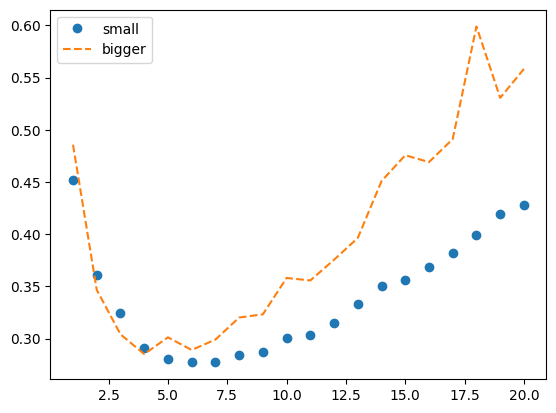

In [28]:
plt.plot(epoch, val_loss_values2, 'o', label = 'small')
plt.plot(epoch, val_loss_values, '--', label = 'bigger')
plt.legend()
plt.show()

Otra manera de optimizar un modelo es a través de regularizer, el cual existe de tipo 1 y de tipo 2 sumando Lamba por la sumatoria del módulo de los pesos y Lamba por la sumatoria de los pesos al cuadrado a la función de costo repectivamente

In [29]:
from keras import regularizers

In [31]:
model3  = models.Sequential()
model3.add(layers.Dense(16, activation = 'relu',
                        input_shape = (10000,),
                        kernel_regularizer = regularizers.l2(0.001)
                        ))
model3.add(layers.Dense(16, activation = 'relu',
           kernel_regularizer = regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation = 'sigmoid'))

In [32]:
model3.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy'
)

In [33]:
history3 = model2.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 512,
          validation_data = (x_val, y_val)
          )

Epoch 1/20
30/30 [==============================] - 2s 82ms/step - loss: 0.0281 - accuracy: 0.9963 - val_loss: 0.4477 - val_accuracy: 0.8725
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0258 - accuracy: 0.9965 - val_loss: 0.4644 - val_accuracy: 0.8720
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0212 - accuracy: 0.9978 - val_loss: 0.4807 - val_accuracy: 0.8718
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0186 - accuracy: 0.9985 - val_loss: 0.5038 - val_accuracy: 0.8700
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0163 - accuracy: 0.9989 - val_loss: 0.5311 - val_accuracy: 0.8657
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0136 - accuracy: 0.9992 - val_loss: 0.5548 - val_accuracy: 0.8637
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0126 - accuracy: 0.9993 - val_loss: 0.5632 - val_accuracy: 0.8679
Epoch 8/20
30

In [34]:
history_dict = history3.history

loss_values = history_dict['loss']
val_loss_values3 = history_dict['val_loss']

epoch = range(1,len(loss_values) + 1)

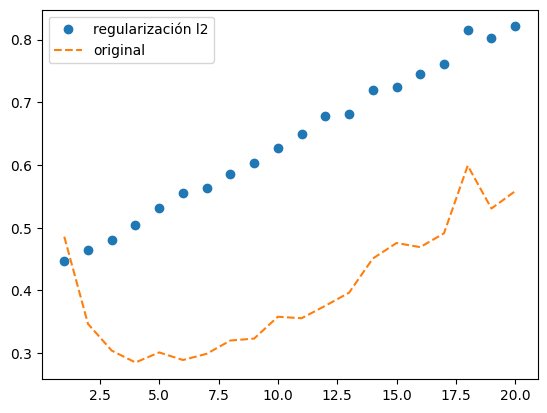

In [35]:
plt.plot(epoch, val_loss_values3, 'o', label = 'regularización l2')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()

Modelo 4 con regularizer l1_l2

In [36]:
model4  = models.Sequential()
model4.add(layers.Dense(16, activation = 'relu',
                        input_shape = (10000,),
                        kernel_regularizer = regularizers.l1_l2(0.001,0.0001)
                        ))
model4.add(layers.Dense(16, activation = 'relu', kernel_regularizer = regularizers.l1_l2(0.001,0.001)))
model4.add(layers.Dense(1, activation = 'sigmoid'))

In [37]:
model4.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy'
)

In [38]:
history4 = model4.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 512,
          validation_data = (x_val, y_val)
          )

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 1.1583 - accuracy: 0.7424 - val_loss: 0.7190 - val_accuracy: 0.8365
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6792 - accuracy: 0.8361 - val_loss: 0.6834 - val_accuracy: 0.8213
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6288 - accuracy: 0.8499 - val_loss: 0.6198 - val_accuracy: 0.8581
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6046 - accuracy: 0.8509 - val_loss: 0.6122 - val_accuracy: 0.8501
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5818 - accuracy: 0.8629 - val_loss: 0.5890 - val_accuracy: 0.8600
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5691 - accuracy: 0.8641 - val_loss: 0.5895 - val_accuracy: 0.8533
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5615 - accuracy: 0.8649 - val_loss: 0.5975 - val_accuracy: 0.8484
Epoch 8/20
30

In [39]:
history_dict = history4.history

loss_values = history_dict['loss']
val_loss_values4 = history_dict['val_loss']

epoch = range(1,len(loss_values) + 1)

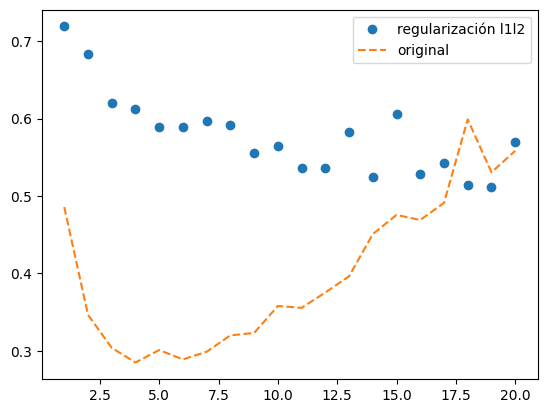

In [40]:
plt.plot(epoch, val_loss_values4, 'o', label = 'regularización l1l2')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()

Dropout

In [41]:
model5  = models.Sequential()
model5.add(layers.Dense(16, activation = 'relu',
                        input_shape = (10000,)
                        ))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(16, activation = 'relu'))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(1, activation = 'sigmoid'))

In [42]:
model5.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy'
)

In [43]:
history5 = model5.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 512,
          validation_data = (x_val, y_val)
          )

Epoch 1/20
30/30 [==============================] - 4s 66ms/step - loss: 0.6485 - accuracy: 0.6145 - val_loss: 0.5681 - val_accuracy: 0.8374
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5469 - accuracy: 0.7425 - val_loss: 0.4527 - val_accuracy: 0.8664
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4581 - accuracy: 0.8067 - val_loss: 0.3729 - val_accuracy: 0.8778
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3976 - accuracy: 0.8449 - val_loss: 0.3261 - val_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3443 - accuracy: 0.8779 - val_loss: 0.3001 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3045 - accuracy: 0.8967 - val_loss: 0.2887 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2751 - accuracy: 0.9139 - val_loss: 0.2780 - val_accuracy: 0.8906
Epoch 8/20
30

In [44]:
history_dict = history5.history

loss_values = history_dict['loss']
val_loss_values5 = history_dict['val_loss']

epoch = range(1,len(loss_values) + 1)

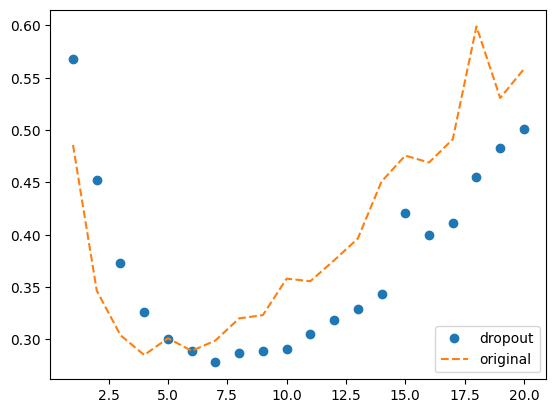

In [45]:
plt.plot(epoch, val_loss_values5, 'o', label = 'dropout')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()